In [1]:
from src.memory_game.game import Game
from src.strategy.strategies import BaseStrategy, PerfectMemory, TileMemory, RandomHashMemory, BaseAttractorMemory, CNNAttractorMemory, RandomAttractorMemory, BernoulliMemory, BinaryAttractorMemory
from src.models.cvmodel import CVModel
from src.models.memory import TileRNN, HashRNN, Attractor, FastAttractor

from fiftyone import ViewField as F

import math

import torch

import pandas as pd

import numpy as np

import collections, gc, resource

from tqdm import tqdm

import seaborn as sns

import itertools

import random

import matplotlib.pyplot as plt
import matplotlib.gridspec as grd
sns.set_style(style='white')        

torch.no_grad()

In [2]:
trials = 200
lab_size = 5
size = 9
distractors = list(itertools.product(list(range(1, lab_size)), list(range(lab_size+1,lab_size+size))))
distractors = [list(ele) for ele in distractors]

tau = 20
lr = 0.9
rr = 0.3

In [3]:
distractors[2]

[1, 8]

In [4]:
def forget(forget_range):
    data = []
    energy = []
    for r in range(forget_range):
        correct = 0
        for n in range(trials):
            dim = lab_size + size
            memory = FastAttractor(dim, lr=lr, rr=rr)
            random.shuffle(distractors)
            input = torch.full([dim], 0.)
            input[[0, 9]] = 1.
            memory(input, tau)
            for i in range(r):
                d_input = torch.full([dim], 0.)
                d_input[distractors[i]] = 1.
                memory(d_input, tau)
            r_input = torch.zeros(dim)
            r_input[9] = 1.
            pos = memory(r_input, tau).flatten()[:size]
            if torch.argmax(pos.flatten()) == 0:
                correct+=1
        data.append(correct / trials)
    return data

In [5]:
forget(10)

[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

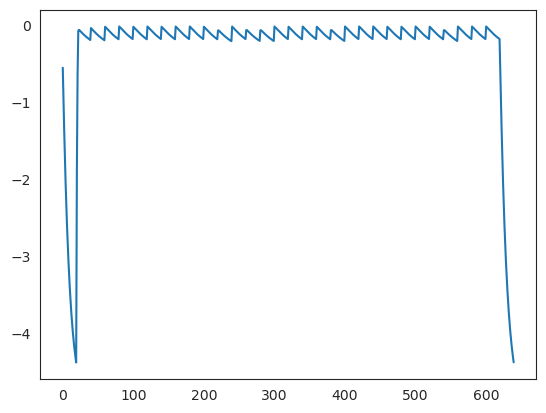

In [12]:
tau = 20
dim = lab_size + size
memory = FastAttractor(dim, lr=0.5, rr=0.9)
random.shuffle(distractors)

for i in range(20):
    d_input = torch.full([dim], -1.)
    d_input[distractors[i]] = 1.
    memory(d_input, tau)

input = torch.full([dim], 0.)
input[[0, 9]] = 1.
memory(input, tau)
for i in range(30):
    d_input = torch.full([dim], -1.)
    d_input[distractors[i]] = 1.
    memory(d_input, tau)
r_input = torch.zeros(dim)
r_input[9] = 1.
pos = memory(r_input, tau).flatten()[:size]

e_h = memory.get_energy_history()
plt.plot(-e_h[400:])